In [1]:
# Import libraries:

import pandas as pd
import numpy as np

In [5]:
# Libraries for plotting:

from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
print("done")

done


C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Here I am using dataset generated in previous Data Wrangling Program

df = pd.read_csv('clean_df.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,diesel.1,gas.1,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,8.703704,13495.0,11.190476,Medium,0,1,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,8.703704,16500.0,11.190476,Medium,0,1,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,9.038462,16500.0,12.368421,Medium,0,1,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,7.833333,13950.0,9.791667,Medium,0,1,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,10.681818,17450.0,13.055556,Medium,0,1,0,1,1,0


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,diesel.1,gas.1,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,13495.0,11.190476,Medium,0,1,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,16500.0,11.190476,Medium,0,1,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.038462,16500.0,12.368421,Medium,0,1,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,7.833333,13950.0,9.791667,Medium,0,1,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,10.681818,17450.0,13.055556,Medium,0,1,0,1,1,0


In [4]:
#  Let's only use numeric data:

df=df._get_numeric_data()

### Functions for plotting

In [6]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

### Part 1: Training and Testing

An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y:

In [8]:
y_data=df['price']

In [9]:
# Drop price data in x data:

x_data=df.drop('price',axis=1)

Now we randomly split our data into training and testing data using the function train_test_split:

In [13]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset.

In [14]:
# Import LinearRegression from the module linear_model:

from sklearn.linear_model import LinearRegression

In [15]:
# Create a Linear Regression object:

lre=LinearRegression()

In [16]:
# Fit the model using the feature 'horsepower':

lre.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Calculate the R^2 on the test data:

lre.score(x_test[['horsepower']],y_test)    

0.3635875575078824

We can see the R^2 is much smaller using the test data.

In [18]:
lre.score(x_train[['horsepower']],y_train)

0.6619724197515103

### Cross-validation Score

In [19]:
# import model_selection from the module cross_val_scor:

from sklearn.model_selection import cross_val_score

done


We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv' determines the number of folds; in this case 4:

In [20]:
Rcross=cross_val_score(lre,x_data[['horsepower']], y_data,cv=4)

The default scoring is R^2; each element in the array has the average R^2 value in the fold:

In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

We can calculate the average and standard deviation of our estimate:

In [22]:
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error':

In [23]:
-1*cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

We can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function:

In [24]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature in this case 'horsepower' , the target data y_data. The parameter 'cv' determines the number of folds, in this case 4. We can produce an output:

In [25]:
yhat=cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Part 2: Overfitting, Underfitting and Model Selection

It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression.

Let's create Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features:

In [26]:
lr=LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Prediction using training data:

yhat_train=lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7626.07835866, 28447.54879659, 14843.98079076,  3855.59931984,
       34568.38266072])

In [28]:
# Prediction using test data:

yhat_test=lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11043.51229094,  5844.10063724, 11258.7189433 ,  6886.90563242,
       15325.32795052])

Let's perform some model evaluation using our training and testing data separately. First we import the seaborn and matplotlibb library for plotting:

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


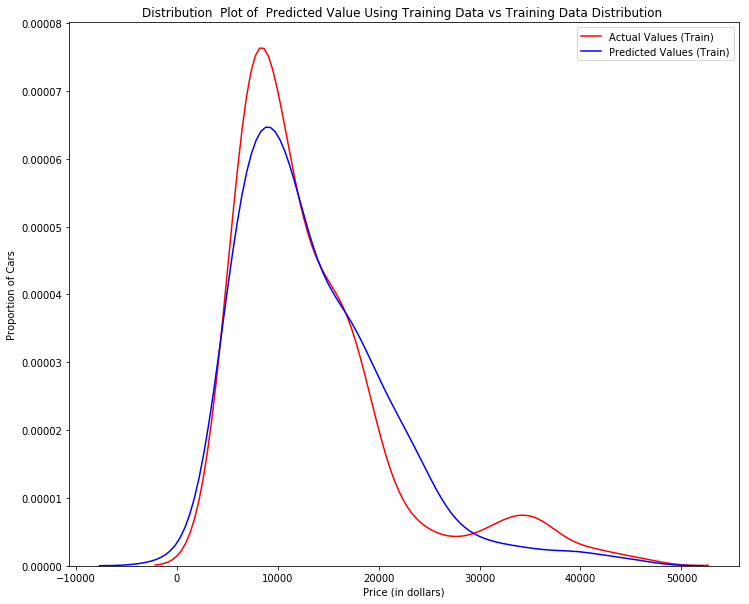

In [30]:
Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution '
DistributionPlot(y_train,yhat_train,"Actual Values (Train)","Predicted Values (Train)",Title)

 Figure 1: Plot of predicted values using the training data compared to the training data. 

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


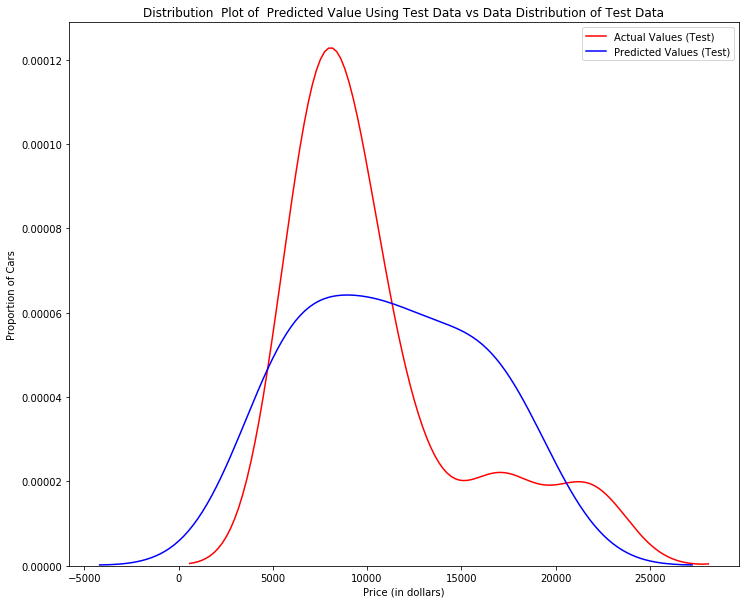

In [31]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value compared to the actual value using the test data.

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

####  Overfitting 
Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for testing and the rest for training:

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
print("done")

done


We will perform a degree 5 polynomial transformation on the feature 'horse power':

In [35]:
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [36]:
# create a linear regression model "poly" and train it:

poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can see the output of our model using the method "predict", then assign the values to "yhat":

In [37]:
yhat=poly.predict(x_test_pr )
yhat[0:5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

Let's take the first five predicted values and compare it to the actual targets:

In [38]:
print("Predicted values:", yhat[0:4])
print("True values:",y_test[0:4].values)

Predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function:

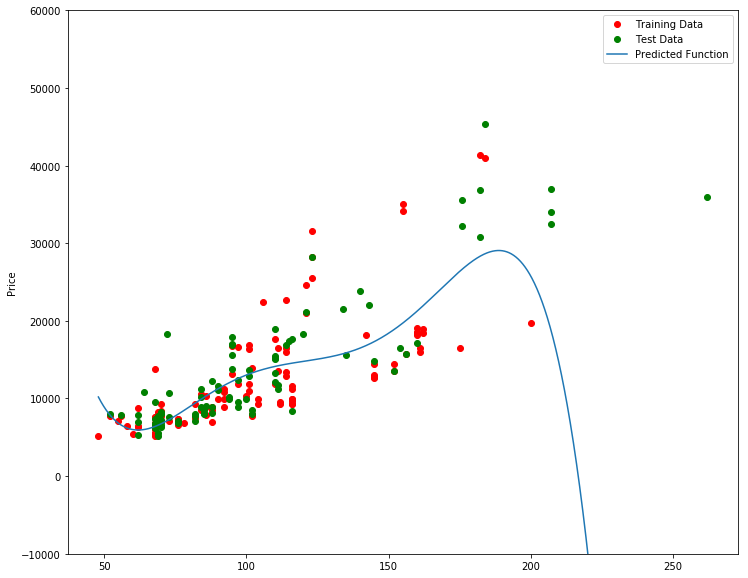

In [40]:
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

Figure 3: A polynomial regression model. Red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but at around 200 horsepower, the function begins to diverge from the data points.

In [41]:
# R^2 of the training data:

poly.score(x_train_pr, y_train)

0.5567716902635091

In [42]:
# R^2 of the test data:

poly.score(x_test_pr, y_test)

-29.87141885918752

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model; a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

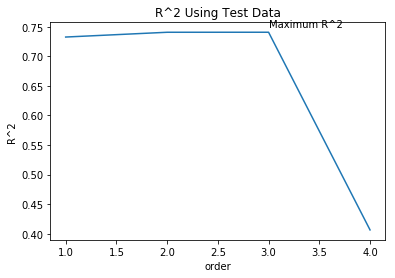

In [43]:
Rsqu_test=[]

order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr=pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr,y_train)
    
    Rsqu_test.append(lr.score(x_test_pr,y_test))

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.

The following function will be used in the next section. Please run the cell.

In [44]:
def f(order,test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr=PolynomialFeatures(degree=order)
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr=pr.fit_transform(x_test[['horsepower']])
    poly=LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)


The following interface allows you to experiment with different polynomial orders and different amounts of data.

In [45]:
interact(f, order=(0,6,1),test_data=(0.05,0.95,0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='test_data', max=0.95, min=0.05, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

### Part 3: Ridge Regression

We will see how the parameter Alfa changes the model. Just a note here, our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data:

In [46]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [47]:
# Let's import Ridge from the module linear models:

from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter to 0.1:

In [48]:
RigeModel=Ridge(alpha=0.1)

Like regular regression, you can fit the model using the method fit:

In [49]:
RigeModel.fit(x_train_pr,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0274760321435058e-16 / 1.1102230246251565e-16
  RuntimeWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
# Similarly, we can obtain a prediction:

yhat=RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:

In [51]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5546.01640087 10302.79765895 21675.39191217 19342.39081773]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of Alfa that minimizes the test error. For example, we can use a for loop:

In [52]:
Rsqu_test=[]
Rsqu_train=[]
dummy1=[]
ALFA=5000*np.array(range(0,10000))
for alfa in ALFA:
    RigeModel=Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr,y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr,y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr,y_train))

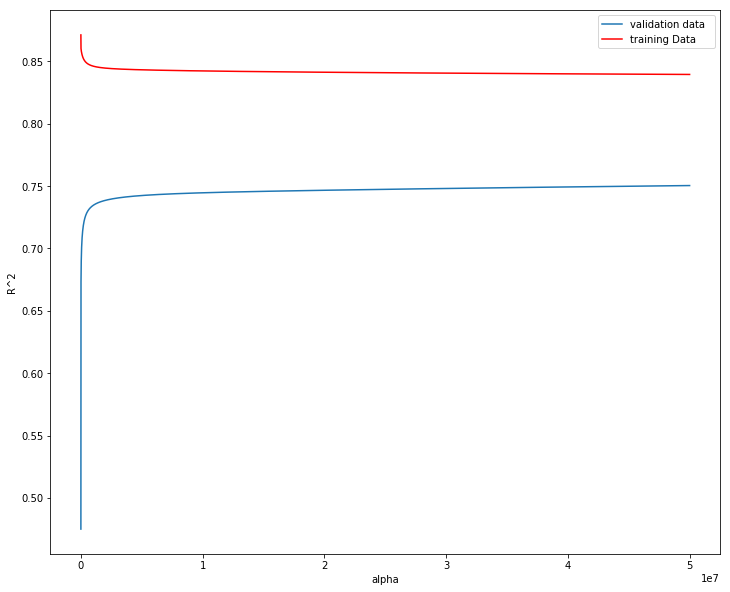

In [53]:
# We can plot out the value of R^2 for different Alphas:

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test,label='validation data  ')
plt.plot(ALFA,Rsqu_train,'r',label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 6: The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa.

The red line in Figure 6 represents the R^2 of the test data; as Alpha increases the R^2 decreases. Therefore, as Alfa increases, the model performs worse on the test data. The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.

### Part 4: Grid Search

The term Alfa is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [54]:
# Import GridSearchCV from the module model_selection:

from sklearn.model_selection import GridSearchCV

In [55]:
# Create a dictionary of parameter values:

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [56]:
# Create a ridge regions object:

RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
# Create a ridge grid search object:

Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [58]:
# Fit the model:

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [59]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
# Test our model on the test data:

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_test)

0.8411379151451632